In [4]:
import soundfile as sf
import numpy as np
from python_speech_features import mfcc

def compute_mfcc(audio_data, sample_rate):
    audio_data = audio_data - np.mean(audio_data)
    audio_data = audio_data / np.max(audio_data)
    mfcc_feat = mfcc(audio_data, sample_rate, winlen=0.025, winstep=0.01,
                     numcep=13, nfilt=26, nfft=512, lowfreq=0, highfreq=None,
                     preemph=0.97, ceplifter=22, appendEnergy=True)
    return mfcc_feat 

def get_mfcc(audio_file):
    audio, sample_rate = sf.read(audio_file)
    feats = compute_mfcc(audio, sample_rate)
    return feats

In [5]:
audio_file = '../data/LibriSpeech/dev-clean/84/121123/84-121123-0000.flac'
get_mfcc(audio_file).shape

(208, 13)

In [6]:
import sys, os

dev_folder = '../data/LibriSpeech/dev-clean'
train_folder = '../data/LibriSpeech/train-clean-100'

dev_set = []

for folder in os.listdir(dev_folder):
    if not '.' in folder:
        for subfolder in os.listdir(os.path.join(dev_folder, folder)):
            if not '.' in subfolder:
                txtfilename = folder + '-' + subfolder + '.trans.txt'
                txtfile = os.path.join(dev_folder, folder, subfolder, txtfilename)
                with open(txtfile) as efile:
                    for line in efile:
                        words = line.strip().split(' ')
                        transcription = ' '.join(words[1:])
                        audio_file = words[0] + '.flac'
                        audio_features = get_mfcc(os.path.join(dev_folder, folder, subfolder, audio_file))
                        dev_set.append((os.path.join(dev_folder, folder, subfolder, audio_file), audio_features, transcription))

In [7]:
import pickle

pickle.dump(dev_set, open('../data/dev_processed-13.p', 'wb'))
print(len(dev_set))
dev_set[0]

2703


('../data/LibriSpeech/dev-clean/2412/153954/2412-153954-0000.flac',
 array([[-11.49838216,   1.60501139,  21.13174142, ...,  12.03173776,
           3.8652147 ,  -6.13610992],
        [-10.02349941,   4.96843193,  22.51133482, ...,  14.41471179,
           4.34796544,  -2.40340694],
        [ -9.70556227,   1.45525581,  23.29748267, ...,  12.96431629,
          -1.12883426,  -0.69579392],
        ...,
        [-13.48078937, -17.43498983,   9.94559513, ...,  14.14954402,
           2.1964683 , -14.83601957],
        [-13.82507653, -24.33179551,   0.98778583, ...,  12.90733187,
           2.39288016, -10.98188254],
        [-13.81705973, -30.73240772,  -7.01409588, ...,  14.65027153,
          -3.18946957,  -7.84306927]]),
 'SHORTLY AFTER PASSING ONE OF THESE CHAPELS WE CAME SUDDENLY UPON A VILLAGE WHICH STARTED UP OUT OF THE MIST AND I WAS ALARMED LEST I SHOULD BE MADE AN OBJECT OF CURIOSITY OR DISLIKE')

In [ ]:
train_set = []

for folder in os.listdir(train_folder):
    if not '.' in folder:
        for subfolder in os.listdir(os.path.join(train_folder, folder)):
            if not '.' in subfolder:
                txtfilename = folder + '-' + subfolder + '.trans.txt'
                txtfile = os.path.join(train_folder, folder, subfolder, txtfilename)
                with open(txtfile) as efile:
                    for line in efile:
                        words = line.strip().split(' ')
                        transcription = ' '.join(words[1:])
                        audio_file = words[0] + '.flac'
                        audio_features = get_mfcc(os.path.join(train_folder, folder, subfolder, audio_file))
                        train_set.append((os.path.join(train_folder, folder, subfolder, audio_file), audio_features, transcription))

In [5]:
import pickle

pickle.dump(train_set, open('../data/train_processed_100.p', 'wb'))
print(len(train_set))
train_set[0]

OSError: [Errno 28] No space left on device

In [74]:
train_audio_lengths = [len(item[1]) for item in train_set]
train_word_lengths = [len(item[2].split(' ')) for item in train_set]

dev_audio_lengths = [len(item[1]) for item in dev_set]
dev_word_lengths = [len(item[2].split(' ')) for item in dev_set]

print('Train data statistics\n')
print('Total instances: {}'.format(len(train_audio_lengths)))
print('Max audio sequence size: {}'.format(np.max(train_audio_lengths)))
print('Min audio sequence size: {}'.format(np.min(train_audio_lengths)))
print('Mean audio sequence size: {}'.format(np.mean(train_audio_lengths)))
print('Max word sequence size: {}'.format(np.max(train_word_lengths)))
print('Min word sequence size: {}'.format(np.min(train_word_lengths)))
print('Mean word sequence size: {}'.format(np.mean(train_word_lengths)))

print('\nDev data statistics\n')
print('Total instances: {}'.format(len(dev_audio_lengths)))
print('Max audio sequence size: {}'.format(np.max(dev_audio_lengths)))
print('Min audio sequence size: {}'.format(np.min(dev_audio_lengths)))
print('Mean audio sequence size: {}'.format(np.mean(dev_audio_lengths)))
print('Max word sequence size: {}'.format(np.max(dev_word_lengths)))
print('Min word sequence size: {}'.format(np.min(dev_word_lengths)))
print('Mean word sequence size: {}'.format(np.mean(dev_word_lengths)))

Train data statistics

Total instances: 28539
Max audio sequence size: 2451
Min audio sequence size: 140
Mean audio sequence size: 1267.6457128841234
Max word sequence size: 75
Min word sequence size: 2
Mean word sequence size: 34.69291145450086

Dev data statistics

Total instances: 2703
Max audio sequence size: 3263
Min audio sequence size: 143
Mean audio sequence size: 716.3666296707362
Max word sequence size: 92
Min word sequence size: 1
Mean word sequence size: 20.126526082130965


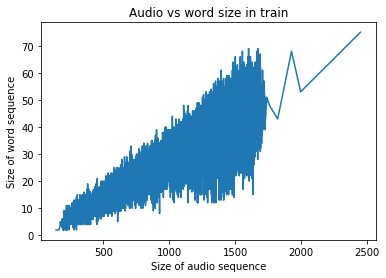

In [73]:
import matplotlib.pyplot as plt

zipped_train = sorted(zip(train_audio_lengths, train_word_lengths))
zipped_dev = sorted(zip(dev_audio_lengths, dev_word_lengths))

x = range(len(train_audio_lengths));
y = [item[0] for item in zipped_train]
z = [item[1] for item in zipped_train]
plt.plot(y, z)
plt.xlabel('Size of audio sequence')
plt.ylabel('Size of word sequence')
plt.title('Audio vs word size in train')
plt.show()

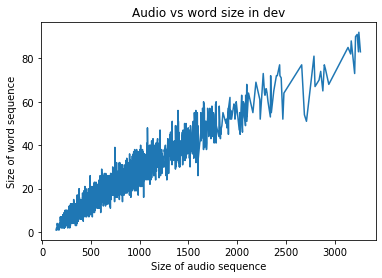

In [72]:
x = range(len(dev_audio_lengths));
y = [item[0] for item in zipped_dev]
z = [item[1] for item in zipped_dev]
plt.plot(y, z)
plt.xlabel('Size of audio sequence')
plt.ylabel('Size of word sequence')
plt.title('Audio vs word size in dev')
plt.show()

In [1]:
import os
from tqdm import tqdm

all_transcriptions = open('/Users/subendhu/Documents/amazon_int_2/data/LibriSpeech/all_transcriptions.txt', 'w')
all_files = []
for split in ['dev-clean', 'test-clean', 'train-clean-100', 'train-clean-360']:
    rootfolder = '/Users/subendhu/Documents/amazon_int_2/data/LibriSpeech/' + split
    for folder in os.listdir(rootfolder):
        if '.' not in folder:
            for subfolder in os.listdir(os.path.join(rootfolder, folder)):
                if '.' not in subfolder:
                    txtfilename = folder + '-' + subfolder + '.trans.txt'
                    txtfile = os.path.join(rootfolder, folder, subfolder, txtfilename)
                    all_files.append(txtfile)

for txtfile in tqdm(all_files):
    with open(txtfile) as t_in:
        for line in t_in:
            all_transcriptions.write(' '.join(line.strip().split(' ')[1:]) + '\n')
all_transcriptions.close()               

100%|██████████| 2866/2866 [00:01<00:00, 1656.15it/s]


In [8]:
all_transcriptions = open('/Users/subendhu/Documents/amazon_int_2/data/LibriSpeech/all_transcriptions.txt', 'w')
all_files = []
for split in ['dev-clean', 'test-clean', 'train-clean-100', 'train-clean-360']:
    rootfolder = '/Users/subendhu/Documents/amazon_int_2/data/LibriSpeech/' + split
    for folder in os.listdir(rootfolder):
        if '.' not in folder:
            for subfolder in os.listdir(os.path.join(rootfolder, folder)):
                if '.' not in subfolder:
                    txtfilename = folder + '-' + subfolder + '.trans.'
                    txtfile = os.path.join(rootfolder, folder, subfolder, txtfilename)
                    all_files.append(txtfile)

for txtfile in tqdm(all_files):
    with open(txtfile + 'txt') as orig:
        with open(txtfile + 'keys.txt', 'w') as key:
            with open(txtfile + 'sent.txt', 'w') as sent:
                for line in orig:
                    words = line.strip().split(' ')
                    key.write(words[0] + '\n')
                    sent.write(' '.join(words[1:]) + '\n')
    command = 'subword-nmt apply-bpe -c /Users/subendhu/Documents/amazon_int_2/data/LibriSpeech/all_transcriptions.codes < '+ txtfile + 'sent.txt' + ' > ' + txtfile + 'sent.bpe.txt'
    os.system(command) 
    with open(txtfile + 'sent.bpe.txt') as bpe_sent:
        with open(txtfile + 'keys.txt') as key:
            with open(txtfile + 'bpe.txt', 'w') as bpe:
                for line in bpe_sent:
                    key_line = key.readline().strip() + ' '
                    bpe.write(key_line + line)   


100%|██████████| 2866/2866 [06:44<00:00,  7.09it/s]


In [49]:
import mxnet as mx
import numpy as np
import nltk

s1 = mx.nd.array([[1,2,3,4], [2,5,6,0]])
l1 = mx.nd.array([4,4])
s2 = mx.nd.array([[1,2,3,4], [2,5,6,0]])
l2 = mx.nd.array([4,3])

s1 = mx.nd.cast(s1, dtype='int32')
l1 = mx.nd.cast(l1, dtype='int32')
s2 = mx.nd.cast(s2, dtype='int32')
l2 = mx.nd.cast(l2, dtype='int32')

scores = []
for i in range(len(s1)):
    sent1 = [c.asscalar() for c in s1[i][:l1[i].asscalar()]]
    sent2 = [c.asscalar() for c in s2[i][:l2[i].asscalar()]]
    print(sent1, sent2)
    max_length = min(len(sent1), len(sent2))
    if max_length == 2:
        weights = [1.0/2]*2
    elif max_length == 1:
        weights = [1]
    elif max_length == 3:
        weights = [1.0/3]*3
    else:
        weights = weights = [1.0/4]*4
    scores.append(nltk.translate.bleu_score.sentence_bleu([sent1], sent2, weights))
print(np.mean(scores))

[1, 2, 3, 4] [1, 2, 3, 4]
[2, 5, 6, 0] [2, 5, 6]
0.8582656552868946
